In [62]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from collections import defaultdict
from IPython import embed

def load_data():
    data = [l.strip() for l in open('iris.data') if l.strip()]
    features = [tuple(map(float, x.split(',')[:-1])) for x in data]
    labels = [x.split(',')[-1] for x in data]
    return np.asarray(features)


'''Return distance'''
def get_distance(data1, data2):
    return np.sqrt(np.sum((data1 - data2)**2))

'''Return random objects as initial medoid'''
def get_medoid(n_clusters, n_samples):
    md = []
    while len(md) < n_clusters:
        x = np.random.randint(0,n_samples)
        if not x in md:
            md.append(x)
    return md

'''Return Total cost and cost of each cluster'''
def get_cost(X, centers_id, dist_func):
    dist_mat = np.zeros((len(X),len(centers_id)))
    # compute distance matrix
    for j in range(len(centers_id)):
        center = X[centers_id[j],:]
        for i in range(len(X)):
            if i == centers_id[j]:
                dist_mat[i,j] = 0
            else:
                dist_mat[i,j] = dist_func(X[i,:], center)
    mask = np.argmin(dist_mat,axis=1)
    members = np.zeros(len(X))
    costs = np.zeros(len(centers_id))
    for i in range(len(centers_id)):
        mem_id = np.where(mask==i)
        members[mem_id] = i
        costs[i] = np.sum(dist_mat[mem_id,i])
    return members, costs, np.sum(costs), dist_mat

'''Return medoids, members, total cost and etc.'''
def kmedoids_run(X, n_clusters, dist_func, max_iter=1000, tol=0.001):
    # Get initial Medoid
    n_samples, n_features = X.shape
    md = get_medoid(n_clusters,n_samples)
    print('Initial medoids are ', md)
    medoids = md
    members, costs, tot_cost, dist_mat = get_cost(X, md,dist_func)
    SWAPED = True
    count = 0
    while True:
        SWAPED = False
        for i in range(n_samples):
            if not i in medoids:
                for j in range(len(medoids)):
                    medoids_ = deepcopy(medoids)
                    medoids_[j] = i
                    members_, costs_, tot_cost_, dist_mat_ = get_cost(X, medoids_,dist_func)
                    if tot_cost_-tot_cost < tol:
                        members, costs, tot_cost, dist_mat = members_, costs_, tot_cost_, dist_mat_
                        medoids = medoids_
                        SWAPED = True
                        print('Change medoids to ', medoids)
        if count > max_iter:
            print('End Searching by reaching maximum iteration', max_iter)
            break
        if not SWAPED:
            print('End Searching by no swaps')
            break
        count += 1
    return medoids,members, costs, tot_cost, dist_mat

class KMedoids(object):
    def __init__(self, n_clusters, dist_func= get_distance, max_iter=500, tol=0.002):
        self.n_clusters = n_clusters
        self.dist_func = dist_func
        self.max_iter = max_iter
        self.tol = tol
    def fit(self, X,plotit=True):
        medoids,members, costs,tot_cost, dist_mat = kmedoids_run(
                X,self.n_clusters, self.dist_func, max_iter=self.max_iter, tol=self.tol)
        if plotit:
            fig, ax = plt.subplots(1,1)
            colors = ['b','k','g','c','y','r','m']
            if self.n_clusters > len(colors):
                raise ValueError('Insert More colors')
            
            for i in range(len(medoids)):
                X_c = X[members==i,:]
                ax.scatter(X_c[:,0],X_c[:,1],c=colors[i],alpha=0.5,s=30)
                ax.scatter(X[medoids[i],0],X[medoids[i],1],c=colors[i],alpha=1.,s=250,marker='*')
        return

    

    def predict(self,X):
        raise NotImplementedError()

Initial medoids are  [7, 68, 95]
Change medoids to  [7, 50, 95]
Change medoids to  [7, 52, 95]
Change medoids to  [7, 52, 55]
Change medoids to  [7, 77, 55]
Change medoids to  [7, 77, 82]
Change medoids to  [7, 77, 92]
Change medoids to  [7, 77, 94]
Change medoids to  [7, 77, 99]
Change medoids to  [7, 103, 99]
Change medoids to  [7, 104, 99]
Change medoids to  [7, 110, 99]
Change medoids to  [7, 111, 99]
Change medoids to  [7, 112, 99]
Change medoids to  [7, 116, 99]
Change medoids to  [7, 147, 99]
End Searching by no swaps


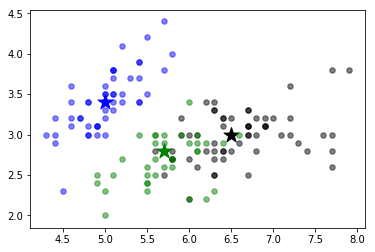

In [63]:
if __name__ == '__main__':
    X = load_data()
    model = KMedoids(n_clusters=3)
    model.fit(X, plotit=True)
    plt.show()
